In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = x.pow(2) + 0.2*torch.rand(x.size())

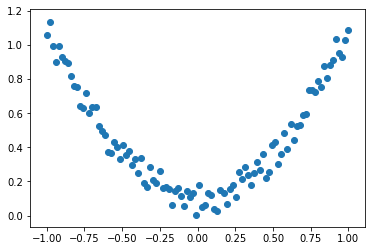

In [3]:
plt.scatter(x.numpy(), y.numpy())
plt.show()

In [4]:
class Net(torch.nn.Module):
    def __init__(self, n_features, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_features, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)
    
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x


In [5]:
net = Net(1, 10, 1)
net

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)

In [6]:
plt.ion()
plt.show()

optimizer = torch.optim.SGD(net.parameters(), 0.5)
loss_func = torch.nn.MSELoss()

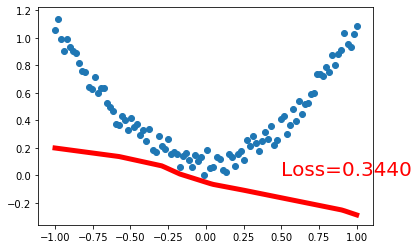

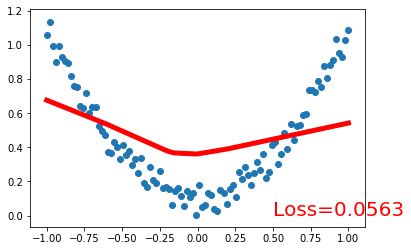

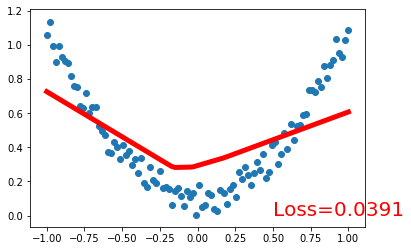

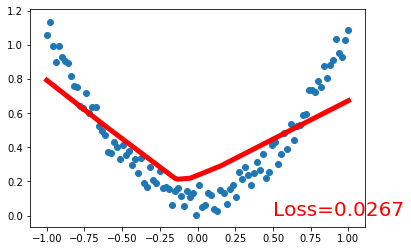

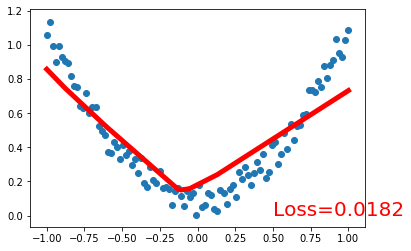

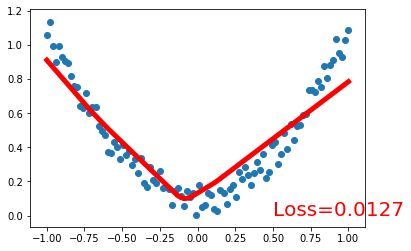

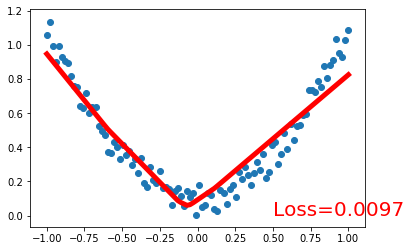

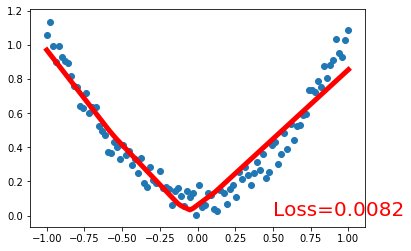

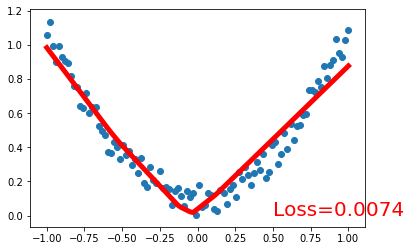

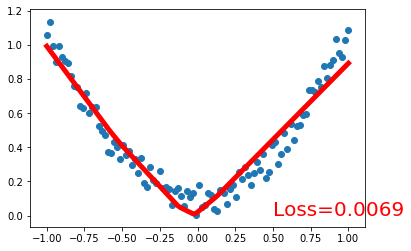

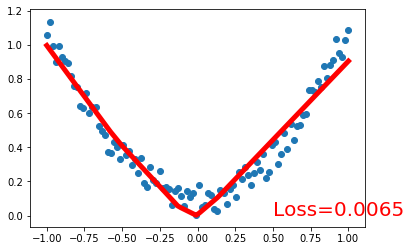

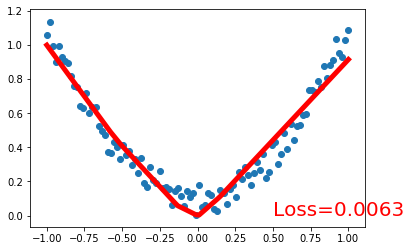

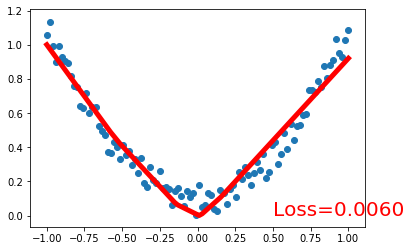

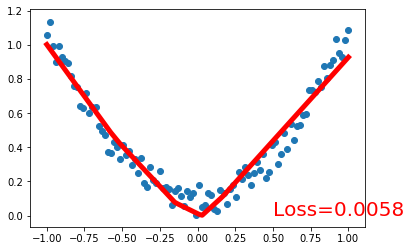

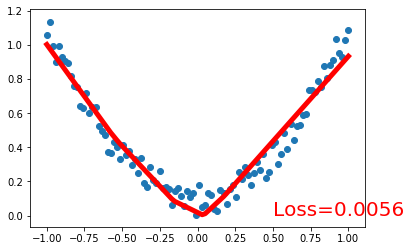

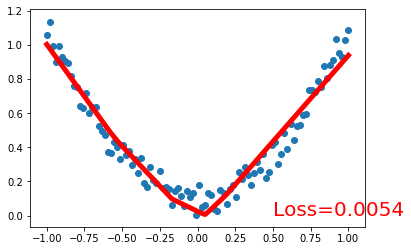

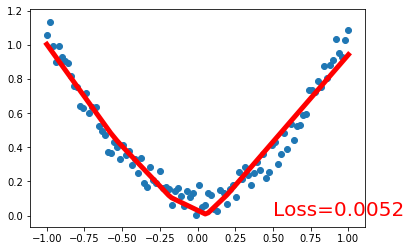

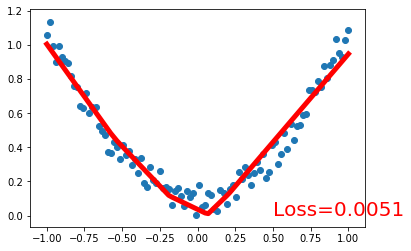

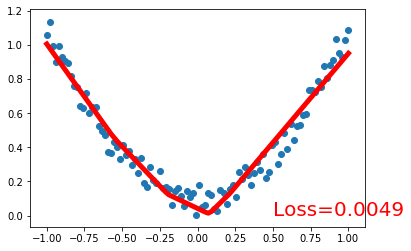

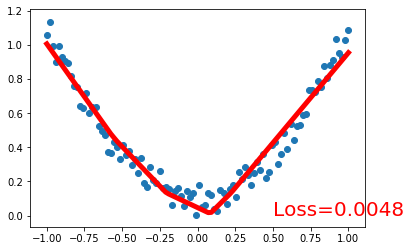

In [7]:
for t in range(100):
    prediction = net(x)
    loss = loss_func(prediction, y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if t % 5 == 0:
        plt.cla()
        plt.scatter(x.numpy(), y.numpy())
        plt.plot(x.detach().numpy(), prediction.detach().numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.item(), fontdict={'size': 20, 'color': 'red'})
        plt.pause(0.1)
        
plt.ioff()
plt.show()